In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
peaks_data = pd.read_csv("peaks_tss_distance.csv")

In [8]:
peaks_stats = pd.read_csv("peak_stats.csv")

In [3]:
peaks_data.head()

,ImmGenATAC1219.peakID,chrom,peak_center,closest_tss,distance_to_tss
0,ImmGenATAC1219.peak_1,chr1,3020786,3671498.0,650712.0
1,ImmGenATAC1219.peak_2,chr1,3087226,3671498.0,584272.0
2,ImmGenATAC1219.peak_3,chr1,3120109,3671498.0,551389.0
3,ImmGenATAC1219.peak_4,chr1,3121485,3671498.0,550013.0
4,ImmGenATAC1219.peak_5,chr1,3372787,3671498.0,298711.0


In [4]:
peaks_data["RegionType"] = peaks_data["distance_to_tss"].apply(
    lambda x: "Promoter" if x <= 1000 else "Enhancer"
)

In [5]:
peaks_data.head()

,ImmGenATAC1219.peakID,chrom,peak_center,closest_tss,distance_to_tss,RegionType
0,ImmGenATAC1219.peak_1,chr1,3020786,3671498.0,650712.0,Enhancer
1,ImmGenATAC1219.peak_2,chr1,3087226,3671498.0,584272.0,Enhancer
2,ImmGenATAC1219.peak_3,chr1,3120109,3671498.0,551389.0,Enhancer
3,ImmGenATAC1219.peak_4,chr1,3121485,3671498.0,550013.0,Enhancer
4,ImmGenATAC1219.peak_5,chr1,3372787,3671498.0,298711.0,Enhancer


In [11]:
peaks_stats.head()

,ImmGenATAC1219.peakID,Mean,Median,SD,CV
0,ImmGenATAC1219.peak_1,0.807586,0.71,0.720603,0.892293
1,ImmGenATAC1219.peak_2,1.135517,0.90,0.920999,0.811084
2,ImmGenATAC1219.peak_3,0.688621,0.40,0.745341,1.082369
3,ImmGenATAC1219.peak_4,0.788621,0.53,0.882103,1.118539
4,ImmGenATAC1219.peak_5,0.697586,0.51,0.571493,0.819244


In [6]:
print(peaks_data["distance_to_tss"].min())
print(peaks_data["distance_to_tss"].max())

0.0
2012626.0


In [14]:
merged = pd.merge(peaks_data, peaks_stats, on="ImmGenATAC1219.peakID")

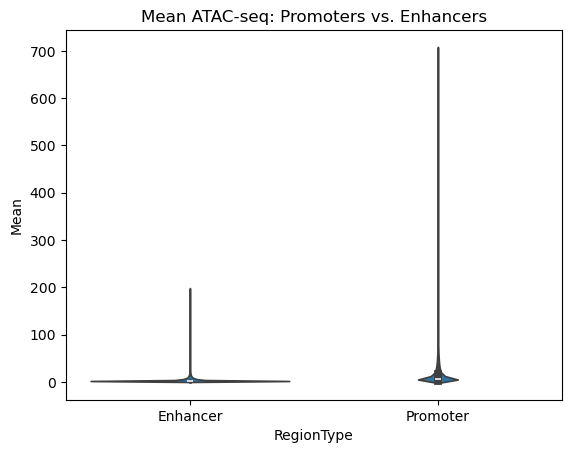

In [ ]:
sns.violinplot(data=merged, x="RegionType", y="Mean")
plt.title("Mean ATAC-seq: Promoters vs. Enhancers")
plt.tight_layout
plt.show()


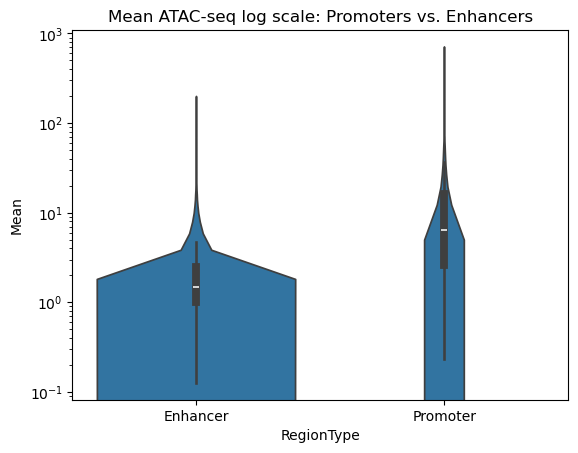

In [16]:
sns.violinplot(data=merged, x="RegionType", y="Mean")
plt.yscale("log")
plt.title("Mean ATAC-seq log scale: Promoters vs. Enhancers")
plt.tight_layout
plt.show()

In [18]:
from scipy.stats import ttest_ind, mannwhitneyu

prom = merged[merged["RegionType"] == "Promoter"]["Mean"]
enh = merged[merged["RegionType"] == "Enhancer"]["Mean"]

# t-test
t_stat, p_ttest = ttest_ind(prom, enh, equal_var=False)

# Mann–Whitney (non-parametric)
u_stat, p_mw = mannwhitneyu(prom, enh)

print(f"T-test p = {p_ttest:.4g}")
print(f"Mann–Whitney p = {p_mw:.4g}")


T-test p = 0
Mann–Whitney p = 0


<div align="justify">
The tests did take fairly long to load. That is why the following code looks only at a random portion of the CREs. Anyhow, the tests show extremely small values that are rounded to 0. Therefore, the H<sub>0</sub> hypothesis (i.e. the two types of regions having the same distribution of signal) can be rejected. 
</div>

In [19]:
prom_sample = prom.sample(n=10000, random_state=1)
enh_sample = enh.sample(n=10000, random_state=1)

_, p = mannwhitneyu(prom_sample, enh_sample)
print(f"Mann–Whitney p = {p:.4g}")


Mann–Whitney p = 0
